<a href="https://colab.research.google.com/github/josephychin/sales-predictions/blob/main/Project_1_Part_4_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 1 - Part 4 (Core)

We will continue to work on your sales prediction project. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

For Part 4, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This may include:

Histograms to view the distributions of various features in your dataset.

Boxplots to view statistical summaries of various features in your dataset.

Bonus: heatmaps of the correlation between features.

Anything else you want to continue to refine for the project so far (feel free to continue work from previous weeks that you did not have time to complete).

Commit your work to GitHub. 

Turn in a link to your GitHub repo! We will continue to work on the project a little bit each week.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
filename = '/content/drive/MyDrive/Coding Dojo/PandasForDataManipulation/sales_predictions_cleaned.csv'
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8523 non-null   int64  
 1   Item_Identifier            8523 non-null   object 
 2   Item_Weight                8523 non-null   float64
 3   Item_Fat_Content           8523 non-null   object 
 4   Item_Visibility            8523 non-null   float64
 5   Item_Type                  8523 non-null   object 
 6   Item_MRP                   8523 non-null   float64
 7   Outlet_Identifier          8523 non-null   object 
 8   Outlet_Establishment_Year  8523 non-null   int64  
 9   Outlet_Size                6113 non-null   object 
 10  Outlet_Location_Type       8523 non-null   object 
 11  Outlet_Type                8523 non-null   object 
 12  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage:

In [5]:
df.isna().sum()

Unnamed: 0                      0
Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df['Outlet_Size'].fillna('N/A', inplace=True)

In [8]:
df.isna().sum()

Unnamed: 0                   0
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

boxplot:year, mrp, sales, weight

hist:year, sales, mrp, weight

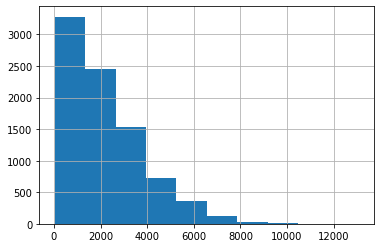

In [9]:
df['Item_Outlet_Sales'].hist()

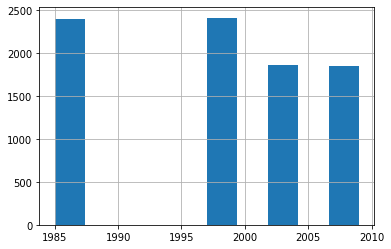

In [15]:
df['Outlet_Establishment_Year'].hist()

In [27]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

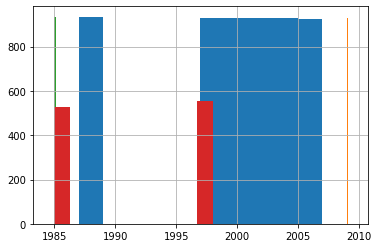

In [52]:
dfSupermarketType1Year = df.loc[df['Outlet_Type'] == 'Supermarket Type1']
dfSupermarketType1Year['Outlet_Establishment_Year'].hist()
dfSupermarketType2Year = df.loc[df['Outlet_Type'] == 'Supermarket Type2']
dfSupermarketType2Year['Outlet_Establishment_Year'].hist()
dfSupermarketType3Year = df.loc[df['Outlet_Type'] == 'Supermarket Type3']
dfSupermarketType3Year['Outlet_Establishment_Year'].hist()
dfGroceryStoreYear = df.loc[df['Outlet_Type'] == 'Grocery Store']
dfGroceryStoreYear['Outlet_Establishment_Year'].hist()

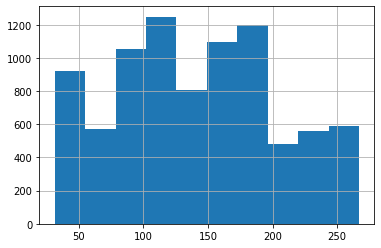

In [16]:
df['Item_MRP'].hist()

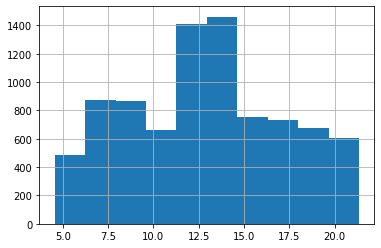

In [17]:
df['Item_Weight'].hist()

{'boxes': [<matplotlib.lines.Line2D at 0x7f5bfe117590>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5bfe126390>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5bfe116c90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5bfe1264d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5bfe1243d0>,
  <matplotlib.lines.Line2D at 0x7f5bfe1183d0>]}

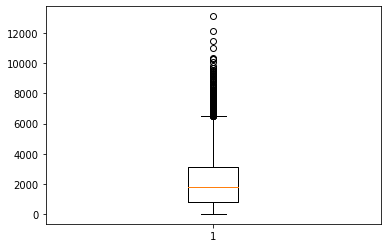

In [20]:
plt.boxplot(df['Item_Outlet_Sales'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'boxes': [<matplotlib.lines.Line2D at 0x7f5be5a3bf50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5be5a3ff50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5be5a48f90>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5be5a48a50>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5be5a3f4d0>,
  <matplotlib.lines.Line2D at 0x7f5be5a78790>]}

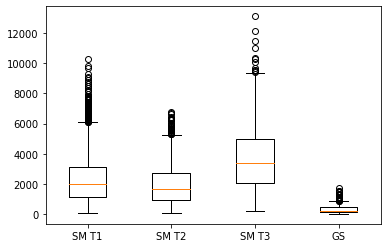

In [67]:
dfSupermarketType1Sales = df.loc[df['Outlet_Type'] == 'Supermarket Type1']
dfST1S = dfSupermarketType1Sales['Item_Outlet_Sales']
dfSupermarketType2Sales = df.loc[df['Outlet_Type'] == 'Supermarket Type2'] 
dfST2S = dfSupermarketType2Sales['Item_Outlet_Sales']
dfSupermarketType3Sales = df.loc[df['Outlet_Type'] == 'Supermarket Type3']
dfST3S = dfSupermarketType3Sales['Item_Outlet_Sales']
dfGroceryStoreSales = df.loc[df['Outlet_Type'] == 'Grocery Store']
dfGSS = dfGroceryStoreSales['Item_Outlet_Sales']
plt.boxplot([dfST1S, dfST2S, dfST3S, dfGSS], labels=['SM T1', 'SM T2', 'SM T3', 'GS'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


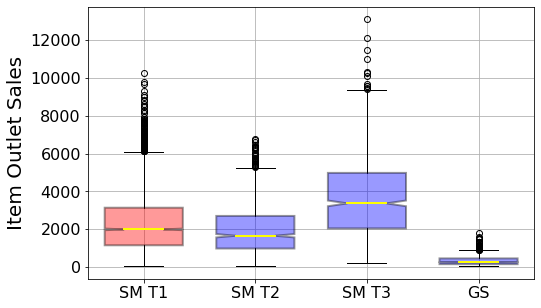

In [74]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 5))
boxplots = axes.boxplot([dfST1S, dfST2S, dfST3S, dfGSS],
                        notch = True,
                        labels = ['SM T1', 'SM T2', 'SM T3', 'GS'],
                        widths = .7,
                        patch_artist = True,
                        medianprops = dict(linestyle = '-', linewidth = 2, color = 'Yellow'),
                        boxprops = dict(linestyle = '--', linewidth = 2, color = 'Black', facecolor = 'blue', alpha = .4)
                        );
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.ylabel('Item Outlet Sales', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);
plt.grid()

{'boxes': [<matplotlib.lines.Line2D at 0x7f5be5c3e0d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5be5c45050>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5be5c4d050>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5be5c45b10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5be5c3e650>,
  <matplotlib.lines.Line2D at 0x7f5be5c3eb90>]}

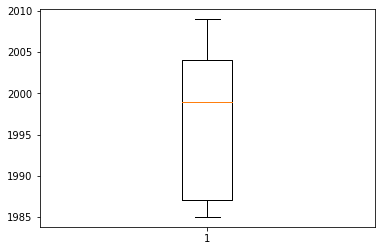

In [63]:
plt.boxplot(df['Outlet_Establishment_Year'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f5bfe1aa9d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5bfe1a1ad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5bfe1b1b50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5bfe1b1d10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5bfe54b150>,
  <matplotlib.lines.Line2D at 0x7f5bfe1a1b10>]}

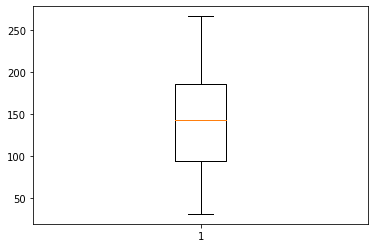

In [19]:
plt.boxplot(df['Item_MRP'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f5bfe0b1090>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5bfe0b80d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5bfe0c7110>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5bfe0b8b90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5bfe0b1610>,
  <matplotlib.lines.Line2D at 0x7f5bfe0b1b50>]}

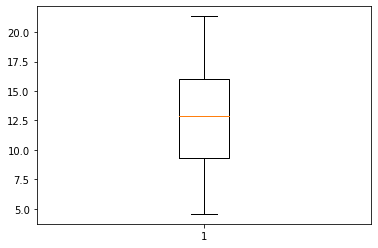

In [22]:
plt.boxplot(df['Item_Weight'])

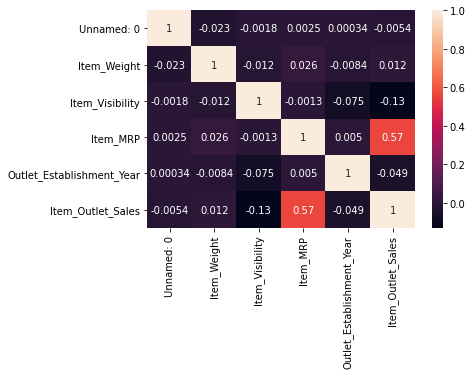

In [23]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, annot = True)